In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

2022-06-21 11:30:01.650410: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-21 11:30:01.650449: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Data preparation

 As the Kaggle entry states, the folder 'dataset2-master' contains 2,500 augmented images with 4 additional subtype labels (JPEG + CSV).

In [2]:
# Make path variable and determine desired image dimensions
test_path = r'/homes/maschepers/Documents/Cell_data_DeepLearning/dataset2-master/dataset2-master/images/TEST/'
train_path = r'/homes/maschepers/Documents/Cell_data_DeepLearning/dataset2-master/dataset2-master/images/TRAIN/'

train_data = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
train_generator = train_data.flow_from_directory(
    directory=train_path,
    batch_size=20,
    color_mode='rgb',
    target_size=(120, 160),
    class_mode='categorical'
)

test_data = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_generator = test_data.flow_from_directory(
    directory=test_path,
    batch_size=20,
    color_mode='rgb',
    target_size=(120, 160),
    class_mode='categorical'
)

Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [3]:
def get_data(generator, batch_size):
    # Store the data in X, y variables by iterating over the batches
    generator.reset()
    X, y = next(generator)
    for i in range(int(len(generator)/batch_size)-1): #1st batch is already fetched before the for loop.
        img, label = next(generator)
        X = np.append(X, img, axis=0 )
        y = np.append(y, label, axis=0)
    print(X.shape, y.shape)
    return X, y


X_train, y_train = get_data(train_generator, 5)
X_test, y_test = get_data(test_generator, 5)

(1980, 120, 160, 3) (1980, 4)
(500, 120, 160, 3) (500, 4)


In [4]:
print("train", X_train.shape, y_train.shape)
print("test", X_test.shape, y_test.shape)

train (1980, 120, 160, 3) (1980, 4)
test (500, 120, 160, 3) (500, 4)


## Data visualization

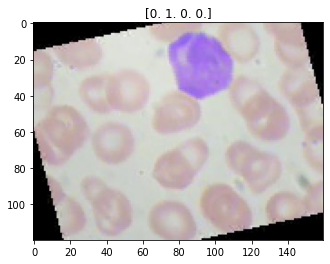

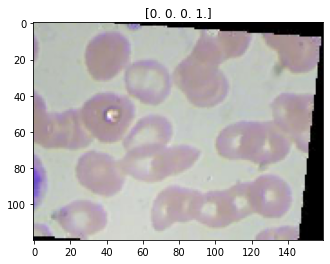

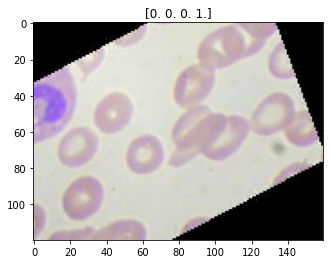

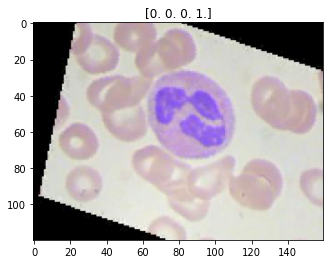

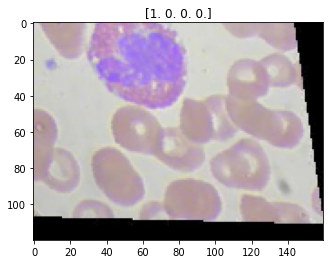

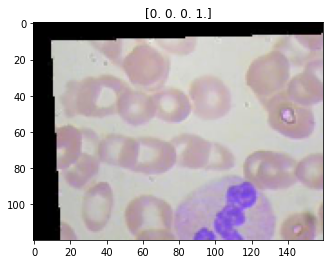

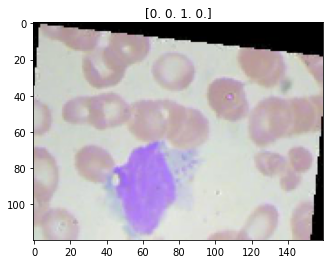

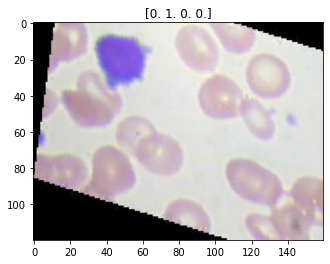

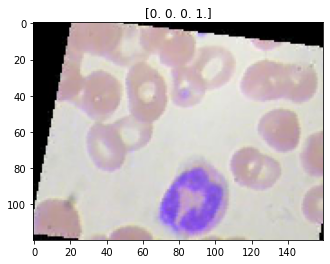

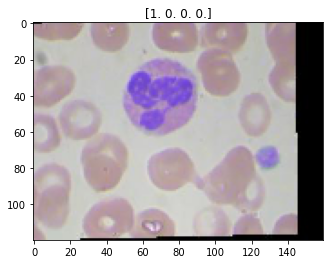

In [5]:
# View images from generator
for i in range(0, 10):
    plt.imshow(X_train[i])
    plt.title(str(y_train[i]))
    plt.show()

### Baseline model

Fit and evaluate one or two classical (i.e. "not deep") supervised machine learning methods that are most suitable to serve as a reference to assess a baseline performance. Briefly motivate your choice(s).

#### Random forest classifier

In [6]:
# sklearn cannot handle the images, it need the data to be reformatted to a 2d array
# Training data
n_samples, n_x, n_y, n_rgb = X_train.shape
x_train2 = X_train.reshape((n_samples,n_x*n_y*n_rgb))
# Testing data
n_samples, n_x, n_y, n_rgb = X_test.shape
x_test2 = X_test.reshape((n_samples,n_x*n_y*n_rgb))

In [7]:
print('Training shape: ', x_train2.shape)
print('Testing shape: ', x_test2.shape)

Training shape:  (1980, 57600)
Testing shape:  (500, 57600)


In [8]:
# Create and fit model
model = RandomForestClassifier()
model.fit(x_train2 , y_train)
# Make predictions using model
y_pred = model.predict(x_test2)

In [9]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.02      0.30      0.04        10
           1       0.14      0.94      0.24        18
           2       0.00      0.00      0.00         0
           3       0.02      0.33      0.03         6

   micro avg       0.04      0.65      0.08        34
   macro avg       0.04      0.39      0.08        34
weighted avg       0.08      0.65      0.15        34
 samples avg       0.04      0.04      0.04        34



/commons/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/commons/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree

Decision Tree is a supervised machine learning technique also often used for classification. It also works with creating trees, where each node ask a yes/no about a specific feature and further splits the trees. This way it is able to find patterns and classify something based on answers from the decision tree.

In [10]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train2,y_train)
y_pred_dtc=dtc.predict(x_test2)

In [11]:
accuracy_score(y_pred_dtc,y_test)
print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.34      0.25      0.29       170
           1       0.26      0.31      0.28       103
           2       0.26      0.30      0.28       105
           3       0.27      0.29      0.28       122

   micro avg       0.28      0.28      0.28       500
   macro avg       0.28      0.29      0.28       500
weighted avg       0.29      0.28      0.28       500
 samples avg       0.28      0.28      0.28       500

